In [1]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json
import pandas as pd
object_lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47]

Populating the interactive namespace from numpy and matplotlib


In [33]:
tiles = pkl.load(open("pixel_em/5workers_rand0/obj1/tiles.pkl"))
mega_mask = pkl.load(open("pixel_em/5workers_rand0/obj1/mega_mask.pkl"))

In [34]:
mask = np.zeros_like(mega_mask)
for tidx in range(len(tiles)):
    for i in list(tiles[tidx]):
        mask[i]=tidx

In [ ]:
def tiles2mask(sample,objid):
    tiles = pkl.load(open("pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
    mega_mask = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample,objid)))
    mask = np.zeros_like(mega_mask)
    for tidx in range(len(tiles)):
        for i in list(tiles[tidx]):
            mask[i]=tidx
    return mask 

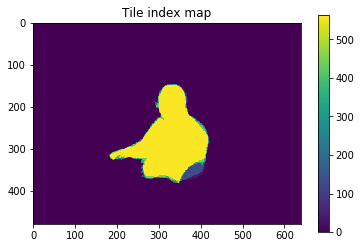

In [5]:
plt.figure()
plt.imshow(mask)
plt.title("Tile index map")
plt.colorbar()

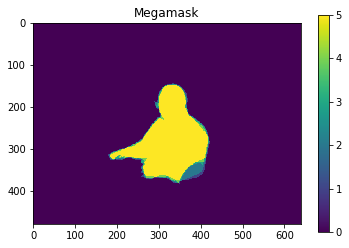

In [6]:
plt.figure()
plt.imshow(mega_mask)
plt.title("Megamask")
plt.colorbar()

# PixTile sanity checks 

In [21]:
def check1(tiles):
    all_tidxs=set()
    for tidxs in tiles:
        all_tidxs= all_tidxs.union(tidxs)
    print "Set union of all index of all tiles is same as size of original image:", len(all_tidxs)==np.prod(np.shape(mega_mask))

In [22]:
check1(tiles)

Set union of all index of all tiles is same as size of original image: True


This most likely means that there should be no pixels that are in multiple tiles, and multiple tiles that have the same pixel, but we will check these independently

In [42]:
def check(tiles,mega_mask,PRINT=False):
    all_tidxs=set()
    check2=True
    for tidxs in tiles:
        if len(all_tidxs.intersection(tidxs))!=0:
            check2=False
        all_tidxs= all_tidxs.union(tidxs)
    check1 =  len(all_tidxs)==np.prod(np.shape(mega_mask))
    if PRINT: 
        print "1. Set union of all index of all tiles is same as size of original image:",check1
        print "2. None of the pixels lie in multiple tiles: ",check2
    return check1 and check2

In [39]:
chk = check(tiles,mega_mask,PRINT=True)

1. Set union of all index of all tiles is same as size of original image: True
2. None of the pixels lie in multiple tiles:  True


In [40]:
chk

True

In [55]:
for sample in tqdm(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0']):
    sampled_object_lst = np.random.choice(object_lst,5, replace=False)
    for objid in sampled_object_lst:
        tiles = pkl.load(open("pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
        mega_mask = pkl.load(open("pixel_em/{}/obj{}/mega_mask.pkl".format(sample,objid)))
        chk = check(tiles,mega_mask)
        if chk: 
            print "GOOD:",sample,objid
        else:
            print "BAD:",sample,objid

  0%|          | 0/6 [00:00<?, ?it/s]

GOOD: 5workers_rand0 13
GOOD: 5workers_rand0 29
BAD: 5workers_rand0 16
GOOD: 5workers_rand0 39


 17%|█▋        | 1/6 [01:09<05:48,  0.01it/s]

GOOD: 5workers_rand0 14
GOOD: 10workers_rand0 45
GOOD: 10workers_rand0 44
GOOD: 10workers_rand0 24
GOOD: 10workers_rand0 22


 33%|███▎      | 2/6 [02:28<04:56,  0.01it/s]

GOOD: 10workers_rand0 46
GOOD: 15workers_rand0 19
GOOD: 15workers_rand0 29
GOOD: 15workers_rand0 44
GOOD: 15workers_rand0 11


 50%|█████     | 3/6 [04:26<04:26,  0.01it/s]

GOOD: 15workers_rand0 47
GOOD: 20workers_rand0 14
GOOD: 20workers_rand0 23
GOOD: 20workers_rand0 18
GOOD: 20workers_rand0 26


 67%|██████▋   | 4/6 [08:01<04:00,  0.01it/s]

GOOD: 20workers_rand0 44
BAD: 25workers_rand0 20
GOOD: 25workers_rand0 31
BAD: 25workers_rand0 2
GOOD: 25workers_rand0 47


 83%|████████▎ | 5/6 [14:53<02:58,  0.01it/s]

GOOD: 25workers_rand0 15
BAD: 30workers_rand0 25
GOOD: 30workers_rand0 24
GOOD: 30workers_rand0 22
BAD: 30workers_rand0 20


GOOD: 30workers_rand0 11
